In [1]:
from fractal_deriv import *

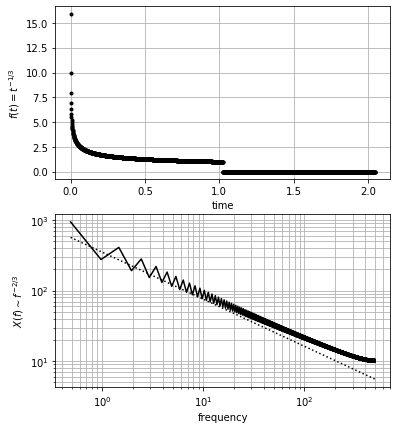

In [2]:
te(N=2048,a=1.e-6,n=Fraction(-1,3),dt=1e-3,eps=.25,trunc=None,oplot=False,color='k',match=None)

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


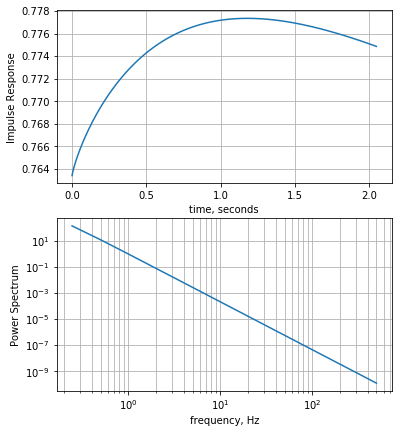

In [3]:
x = design_filt(dt=1e-3, N=2**12)

2048

/Users/adityasengupta/projects/adaptive-optics/control/dev/fractal_deriv.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y[k] = np.sum(u[range(k,k-L,-1)]*a[0:L])


0.008338277950617836

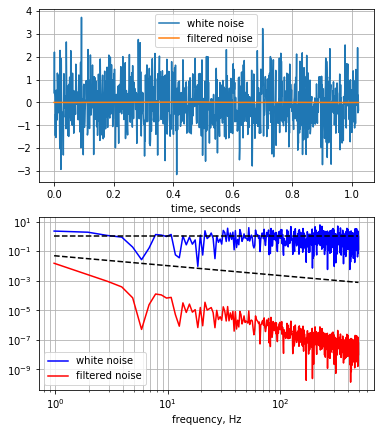

In [4]:
rms = lambda data: np.sqrt(np.mean(data**2))
filtered = filt(x,dt=1e-3,u=None,N=1024,plot=True,oplot=False)
rms(filtered) # from driving noise that's rms 1

0.000760067352313091

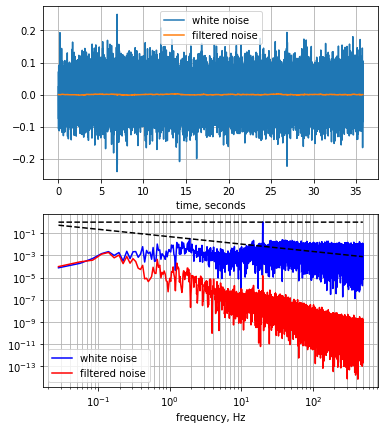

In [5]:
centroids = np.load('keck_tt/Centroid_n0088.npy')
centroids_x = centroids[:, 0]
filtered_keck = filt(x, dt=1e-3, u=centroids_x)
rms(filtered_keck)

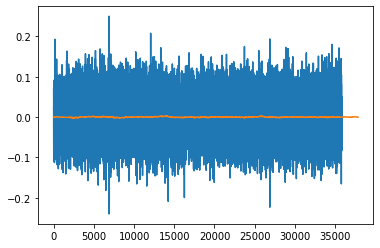

In [12]:
plt.plot(centroids[:,0])
plt.plot(np.convolve(x/sum(x), centroids[:,0]).real)

In [6]:
combined = np.load('combined.npy')